In [11]:
import numpy as np
from sklearn import neighbors, svm
import matplotlib.pyplot as pl
%matplotlib inline

## Test learning on pretraining dataset

In [16]:
metadata_path = '~/audiosearch/data/UrbanSound8K/metadata/UrbanSound8K_by_fold.csv'
fold_path = '/home/mzhan/audiosearch/data/UrbanSound8K/folds.csv'
class_path = '/home/mzhan/audiosearch/data/UrbanSound8K/classes.csv'
feature_path = '/home/mzhan/audiosearch/data/UrbanSound8K/features.npy'
centroid_path = '/home/mzhan/audiosearch/data/UrbanSound8K/centroids151209.npy'


TypeError: Invalid dimensions for image data

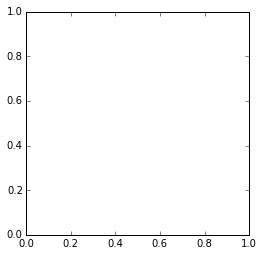

In [19]:
centroids = np.load(centroid_path)

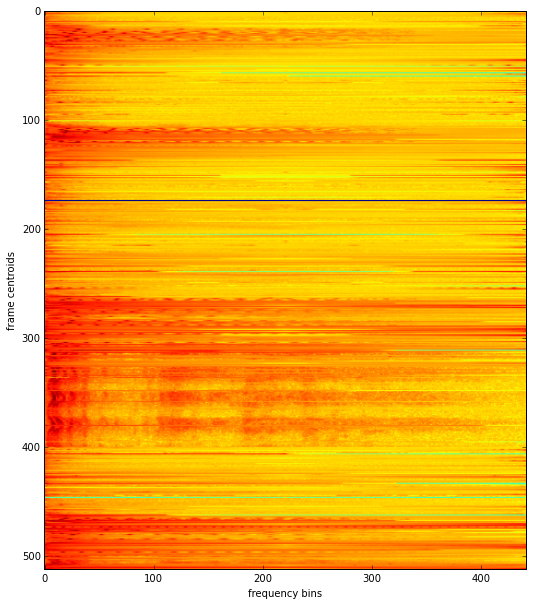

In [34]:
pl.figure(figsize=(20,10))
pl.imshow(centroids[0,7])
pl.ylabel('frame centroids')
pl.xlabel('frequency bins')

## data partition

In [ ]:
pl.plot(X.sum(1))

In [55]:
s = X.sum(1)
print s.shape, s.reshape((len(X),1)).shape



(8732,) (8732, 1)


In [51]:
X.sum(1).repeat(10, axis=1).shape

ValueError: axis(=1) out of bounds

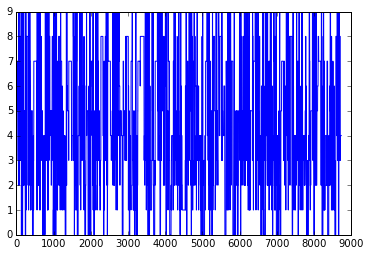

In [66]:
pl.plot(Y)

In [108]:
# Load and display data
X = np.load(feature_path)
Y = np.loadtxt(class_path)

In [95]:
normalized

array([[ 0.    ,  0.    ,  0.    , ...,  0.035 ,  0.0375,  0.045 ],
       [ 0.    ,  0.    ,  0.    , ...,  0.035 ,  0.04  ,  0.04  ],
       [ 0.    ,  0.    ,  0.    , ...,  0.045 ,  0.0475,  0.0525],
       ..., 
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.3275,  0.6725],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.1625,  0.8375],
       [ 0.    ,  0.    ,  0.    , ...,  0.0025,  0.16  ,  0.8375]])

(0, 100)

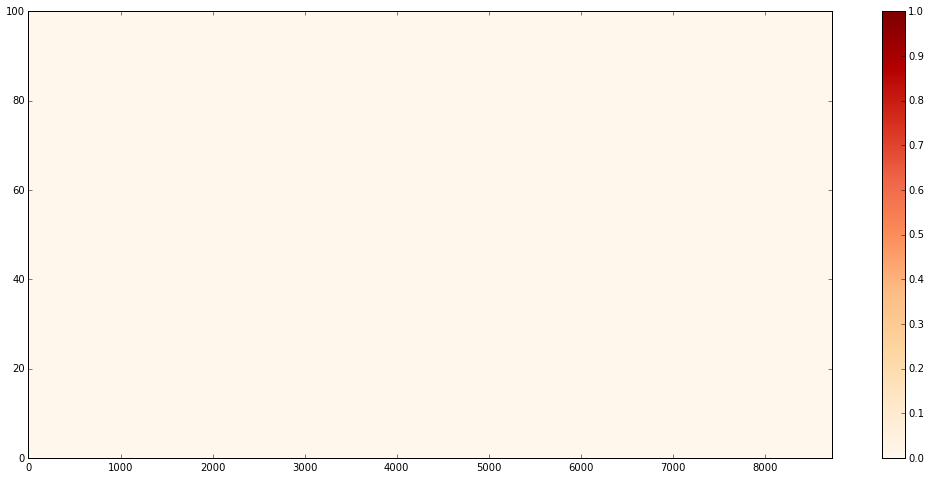

In [135]:
sums = X.sum(1).reshape((len(X),1))
normalized = np.divide(X, sums, dtype=float)

# sort features
sort_inds = normalized.sum(0).argsort()
sortedX = normalized[:,sort_inds]

pl.figure(figsize=(18,8))
pl.imshow(sortedX.T, aspect='auto', cmap = pl.get_cmap('OrRd'))
#pl.ylim([256, 511])
pl.colorbar()
pl.ylim([0, 100])

Many features don't matter much...

In [140]:
cut = 200
Xcut = sortedX[:, :cut]
print np.max(Xcut), np.median(Xcut), np.mean(Xcut)
print np.sum(Xcut>0.01), 'files contain features of frequciecies greater than 0.1'

0.12 0.0 4.10762196932e-06
169 files contain features of frequciecies greater than 0.1


In [81]:
# training split
import random
fold_partition = range(10)
random.shuffle(fold_partition)
train = fold_partition[:5]
validate = fold_partition[5]
test = fold_partition[6:]

folds = np.loadtxt(fold_path)-1



In [82]:
print train, validate, test
train_inds = np.any([folds == f for f in train], axis=0)
print train_inds.sum()
validate_inds = (folds == validate)
print validate_inds.sum()
test_inds = np.any([folds == f for f in test], axis=0)
print test_inds.sum()
print len(folds)

[2, 6, 0, 9, 1] 7 [5, 3, 4, 8]
4361
806
3565
8732


## classification

In [142]:
c1 = neighbors.KNeighborsClassifier()
c1.fit(Xcut[train_inds], Y[train_inds])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [144]:
correct = (c1.predict(Xcut[train_inds])==Y[train_inds])
print correct.sum()*1./len(train_inds)

[ 0.00011452  0.          0.00011452 ...,  0.          0.          0.        ]


0.0560009161704
